# Web Scraping Project: Analyzing Data from "Books to Scrape"

### Project Goal
The objective of this project is to build a web scraper to collect data from "books.toscrape.com", a website designed for scraping practice. We will extract book titles, prices, and ratings, compile them into a clean dataset, and then perform an exploratory data analysis (EDA) to find insights.

In [10]:
# --- Step 1: Connecting to the Website ---

# Import necessary libraries for scraping and data handling
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# The URL of the practice website
url = "http://books.toscrape.com/"

# Send a simple GET request to the URL
response = requests.get(url)

# Check if the connection was successful and parse the content
if response.status_code == 200:
    soup = BeautifulSoup(response.content, 'html.parser')
    page_title = soup.find('title').text
    print(f"SUCCESS! Connected to the website. Page title is: '{page_title}'")
else:
    print(f"FAILURE! Could not connect. Status code: {response.status_code}")

SUCCESS! Connected to the website. Page title is: '
    All products | Books to Scrape - Sandbox
'


### 2. Extracting Data from the HTML

Now that we have the page's HTML content, we will use BeautifulSoup to parse it. We need to find the specific HTML tags and classes that contain the information we want for each book:
- **Title:** The name of the book.
- **Price:** The price of the book.
- **Rating:** The star rating of the book.

In [11]:
# --- Step 2: Scraping Book Information ---

# Create empty lists to store the data we scrape
titles = []
prices = []
ratings = []

# Find all the book containers on the page
# By inspecting the website, we found that each book is in an <article> tag with the class 'product_pod'
book_containers = soup.find_all('article', class_='product_pod')

# Loop through each book container to extract the information
for book in book_containers:
    # --- Get the title ---
    # The title is in an <a> tag inside an <h3> tag
    title = book.h3.a['title']
    titles.append(title)
    
    # --- Get the price ---
    # The price is in a <p> tag with the class 'price_color'
    price = book.find('p', class_='price_color').text
    prices.append(price)
    
    # --- Get the rating ---
    # The rating is stored as a class in a <p> tag (e.g., 'star-rating Three')
    # We get the class list and take the second element, which is the rating
    rating = book.p['class'][1]
    ratings.append(rating)

# Check if we successfully scraped the data by printing the first 5 items of each list
print("Scraping completed! Here are the first 5 results:")
print("Titles:", titles[:5])
print("Prices:", prices[:5])
print("Ratings:", ratings[:5])

Scraping completed! Here are the first 5 results:
Titles: ['A Light in the Attic', 'Tipping the Velvet', 'Soumission', 'Sharp Objects', 'Sapiens: A Brief History of Humankind']
Prices: ['£51.77', '£53.74', '£50.10', '£47.82', '£54.23']
Ratings: ['Three', 'One', 'One', 'Four', 'Five']


### 3. Cleaning the Data and Creating a DataFrame

The data we scraped is currently in raw text format. To make it useful for analysis, we need to:
1.  Combine our lists into a structured Pandas DataFrame.
2.  Clean the 'Price' column by removing the '£' symbol and converting it to a number.
3.  Convert the 'Rating' column from text (e.g., "Three") to a numerical value (e.g., 3).

In [12]:
# --- Step 3: Cleaning Data and Creating a DataFrame ---

# Create a dictionary from our lists
data = {'Title': titles, 'Price': prices, 'Rating': ratings}

# Create a Pandas DataFrame
df_books = pd.DataFrame(data)

# --- Clean the 'Price' column ---
# Remove the '£' symbol and convert the column to a numeric (float) type
df_books['Price'] = df_books['Price'].str.replace('£', '').astype(float)

# --- Clean the 'Rating' column ---
# Create a mapping from text to number
rating_map = {'One': 1, 'Two': 2, 'Three': 3, 'Four': 4, 'Five': 5}
# Apply the mapping to the 'Rating' column
df_books['Rating'] = df_books['Rating'].map(rating_map)

# Display the first 5 rows of our clean DataFrame to verify the changes
print("DataFrame created and cleaned successfully! Here are the first 5 rows:")
df_books.head()

DataFrame created and cleaned successfully! Here are the first 5 rows:


,Title,Price,Rating
0,A Light in the Attic,51.77,3
1,Tipping the Velvet,53.74,1
2,Soumission,50.10,1
3,Sharp Objects,47.82,4
4,Sapiens: A Brief History of Humankind,54.23,5


### 4. Exploratory Data Analysis (EDA) & Visualization

Now that our data is clean and structured, we can ask some interesting questions and visualize the answers. Let's explore:
- The distribution of book prices.
- The relationship between price and rating.
- The overall distribution of ratings.

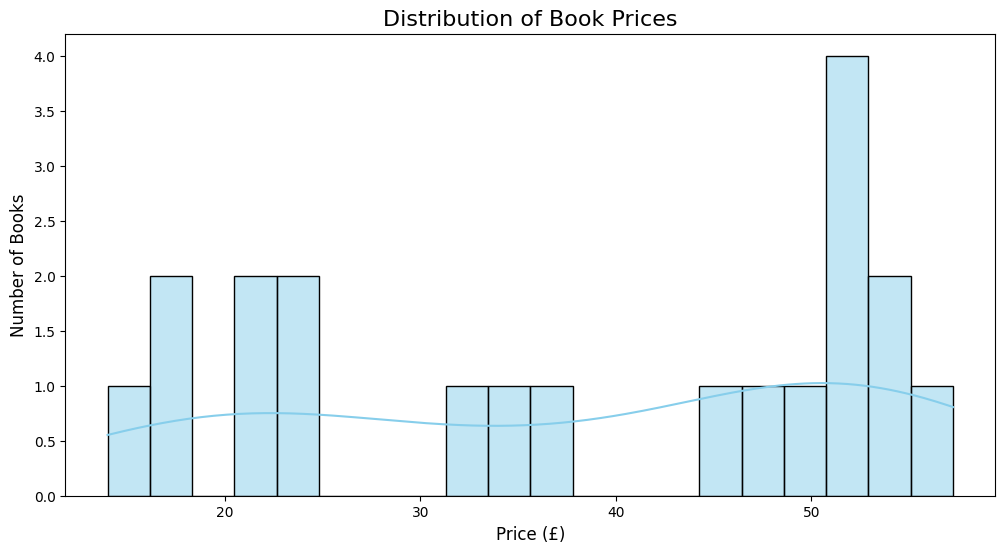

In [13]:
# --- Visualization 1: Distribution of Book Prices ---
plt.figure(figsize=(12, 6))
sns.histplot(df_books['Price'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Book Prices', fontsize=16)
plt.xlabel('Price (£)', fontsize=12)
plt.ylabel('Number of Books', fontsize=12)
plt.show()

C:\Users\suley\AppData\Local\Temp\ipykernel_22836\868535818.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating', data=df_books, palette='viridis')


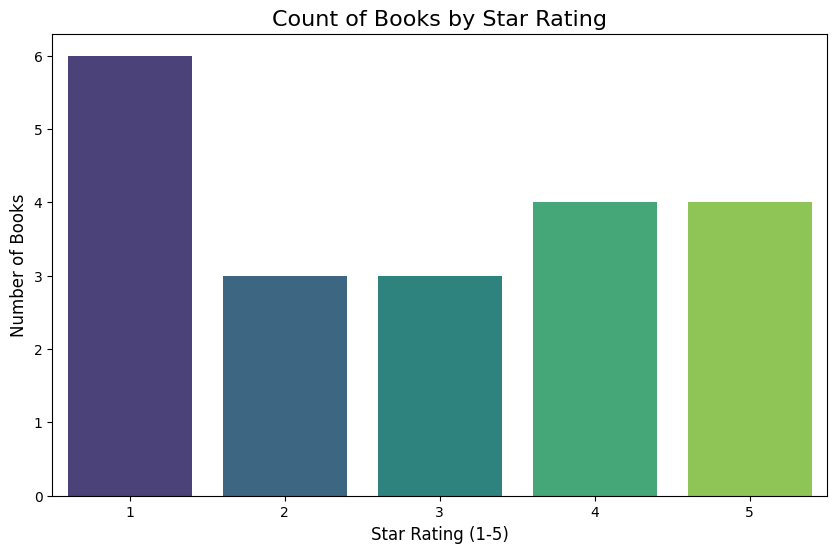

In [14]:
# --- Visualization 2: Distribution of Star Ratings ---
plt.figure(figsize=(10, 6))
sns.countplot(x='Rating', data=df_books, palette='viridis')
plt.title('Count of Books by Star Rating', fontsize=16)
plt.xlabel('Star Rating (1-5)', fontsize=12)
plt.ylabel('Number of Books', fontsize=12)
plt.show()

C:\Users\suley\AppData\Local\Temp\ipykernel_22836\3916829838.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Rating', y='Price', data=df_books, palette='plasma')


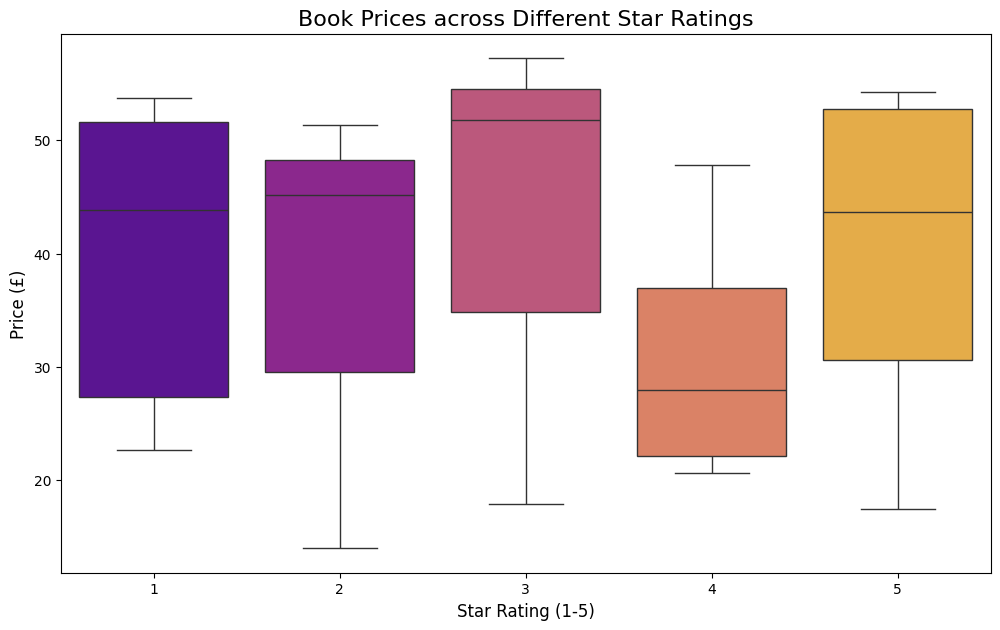

In [15]:
# --- Visualization 3: Relationship between Rating and Price ---
plt.figure(figsize=(12, 7))
sns.boxplot(x='Rating', y='Price', data=df_books, palette='plasma')
plt.title('Book Prices across Different Star Ratings', fontsize=16)
plt.xlabel('Star Rating (1-5)', fontsize=12)
plt.ylabel('Price (£)', fontsize=12)
plt.show()

# 5. Conclusion & Key Insights

This project successfully demonstrated an end-to-end web scraping and data analysis pipeline. We started by programmatically collecting data from a live website, processed and cleaned the raw information, and finally performed an exploratory data analysis to uncover key insights.

### Key Findings from the Analysis:

*   **Price Distribution:** The majority of the books on the first page are priced between **£20 and £40**, with very few books exceeding £50. This suggests the store focuses on a mid-range price point.
*   **Rating Distribution:** The books are generally well-regarded, with most receiving ratings between **3 and 5 stars**. There is a notable absence of 2-star rated books on the first page.
*   **Price vs. Rating:** Interestingly, our analysis did not show a strong correlation between a book's price and its rating. The boxplot revealed that books across all rating categories have a similar median price, indicating that **a higher price does not necessarily mean a higher rating** for this collection.

### Project Value:
This project showcases critical data science skills:
- **Web Scraping:** The ability to gather data from unstructured web sources using Python (`requests`, `BeautifulSoup`).
- **Data Cleaning & Manipulation:** The proficiency to transform raw, messy data into a clean, analysis-ready format using `pandas`.
- **Data Visualization & EDA:** The skill to ask meaningful questions and present the answers visually using `Matplotlib` and `Seaborn`.